# ABOUT THE DATASET

SMS Spam Collection v.1
-------------------------

**1. DESCRIPTION**
--------------

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

1.1. Compilation
----------------

This corpus has been collected from free or free for research sources at the Web:

- A collection of between 425 SMS spam messages extracted manually from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Theses available at http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf
- A subset of 3,375 SMS ham messages of the NUS SMS Corpus (NSC), which is a corpus of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/
- The amount of 1,002 SMS ham messages and 322 spam messages extracted from the SMS Spam Corpus v.0.1 Big created by José María Gómez Hidalgo and public available at: http://www.esp.uem.es/jmgomez/smsspamcorpus/


1.2. Statistics
---------------

There is one collection:

- The SMS Spam Collection v.1 (text file: smsspamcollection) has a total of 4,827 SMS legitimate messages (86.6%) and a total of 747 (13.4%) spam messages.


1.3. Format
-----------

The files contain one message per line. Each line is composed by two columns: one with label (ham or spam) and other with the raw text. Here are some examples:

ham   What you doing?how are you?
ham   Ok lar... Joking wif u oni...
ham   dun say so early hor... U c already then say...
ham   MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham   Siva is in hostel aha:-.
ham   Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam   FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam   Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam   URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: messages are not chronologically sorted.

# IMPORTING THE LIBRARIES

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [102]:
SMS=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])
SMS.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
SMS.columns

Index(['label', 'message'], dtype='object')

In [104]:
#CLEANING THE DATA
wordnet=WordNetLemmatizer()
corpus=[]
for i in range(0,len(SMS)):
    review=re.sub('^[a-zA-Z]',' ',SMS['message'][i])
    review=review.lower()
    review=review.split()
    review=[wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=" ".join(review)
    corpus.append(review)



In [123]:
#Creating the TFIDF VECTOR
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(encoding='utf-8',max_features=5000,decode_error='strict',norm='l2',analyzer='word',use_idf=True,smooth_idf=True,sublinear_tf=True)
X=cv.fit_transform(corpus).toarray()
print(len(cv.get_feature_names()))
print(X.shape)

5000
(5572, 5000)


In [107]:
y=pd.get_dummies(SMS['label'])
y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# INTRODUCTION TO THE ALGORITHUM :

**Table of Contents:**

**What is Naive Bayes algorithm?**

**How Naive Bayes Algorithms works?**

**What are the Pros and Cons of using Naive Bayes?**

**4 Applications of Naive Bayes Algorithm**

**Steps to build a basic Naive Bayes Model in Python**

**Tips to improve the power of Naive Bayes Model**

**What is Naive Bayes algorithm?**

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

**For example:** 

A fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

**P(C/X)=P(X/C).P(C)
         ___________
            P(X)**
P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).

P(c) is the prior probability of class.

P(x|c) is the likelihood which is the probability of predictor given class.

P(x) is the prior probability of predictor.

How Naive Bayes algorithm works? Now, we need to classify whether players will play or not based on weather condition.

**Let’s follow the below steps to perform it.**

Step 1: Convert the data set into a frequency table

Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29

and probability of playing is 0.64

Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class.

The class with the highest posterior probability is the outcome of prediction

Problem: Players will play if weather is sunny. Is this statement is correct?

We can solve it using above discussed method of posterior probability.

P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)

Here we have P (Sunny |Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64

Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes.

This algorithm is mostly used in text classification and with problems having multiple classes.

**What are the Pros and Cons of Naive Bayes?**

**Pros:**

It is easy and fast to predict class of test data set. It also perform well in multi class prediction

When assumption of independence holds, a Naive Bayes classifier performs better compare to other models

like logistic regression and you need less training data.

It perform well in case of categorical input variables compared to numerical variable(s).

For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption). Cons:

If categorical variable has a category (in test data set), which was not observed in training data set,

then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as

“Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is

called Laplace estimation.

On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to

be taken too seriously.

Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible

that we get a set of predictors which are completely independent.

Applications of Naive Bayes Algorithms

**Real time Prediction**: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for

making predictions in real time.

**Multi class Prediction**: This algorithm is also well known for multi class prediction feature.

Here we can predict the probability of multiple classes of target variable.

Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification

(due to better result in multi class problems and independence rule) have higher success rate as compared to other

algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis

(in social media analysis, to identify positive and negative customer sentiments)

**Recommendation System**: Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that

uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a

given resource or not

How to build a basic model using Naive Bayes in Python ?

Again, scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of

Naive Bayes model under the scikit-learn library:

**Gaussian: It is used in classification and it assumes that features follow a normal distribution.**

**Multinomial: It is used for discrete counts. For example, let’s say, we have a text classification problem. Here we can**

**consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how**

**often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n**

**trials”**

**Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would**

**be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not**

**occur in the document” respectively.**

# Model Building

In [108]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# Name based classifier - GaussianNB

In [109]:
#Training the model 
from time import time
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 

print("Start training...")
tStart = time()
gnb.fit(X_train, y_train)
tEnd = time()
print("Training time: ", round(tEnd-tStart, 3), "s")

#### making predictions on the training set 
y_pred_train = gnb.predict(X_train) 
print("Train Dataset Accuracy: ", metrics.accuracy_score(y_train, y_pred_train)*100)

#### making predictions on the testing set 
y_pred_GNB = gnb.predict(X_test) 
print("Test Dataset Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.552 s
Train Dataset Accuracy:  92.3939869867624
Test Dataset Accuracy:  97.9372197309417


Confusion Matrix is:
[[860  95]
 [ 13 147]]


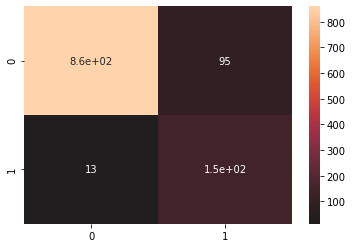

In [110]:
#### Confusion matrix for name base classifier
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_GNB)
print("Confusion Matrix is:", cm, sep='\n') 
sns.heatmap(cm,center=True,annot=True)

In [111]:
from sklearn.metrics import classification_report
CR=classification_report(y_test,y_pred_GNB)
print(CR)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       955
           1       0.61      0.92      0.73       160

    accuracy                           0.90      1115
   macro avg       0.80      0.91      0.84      1115
weighted avg       0.93      0.90      0.91      1115



Area under the curve: 0.909636780104712


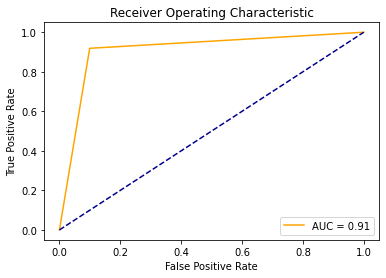

In [112]:
#### Return probability estimates for the test vector 
probs = gnb.predict_proba(X_test)

#### Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc_GNB = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc_GNB)

#### plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc_GNB)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Name based classifier - BernoulliNB

In [113]:
#Training the model 
from time import time
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB() 

print("Start training...")
tStart = time()
bnb.fit(X_train, y_train)
tEnd = time()
print("Training time: ", round(tEnd-tStart, 3), "s")

#### making predictions on the training set 
y_pred_train = bnb.predict(X_train) 
print("Train Dataset Accuracy: ", metrics.accuracy_score(y_train, y_pred_train)*100)

#### making predictions on the testing set 
y_pred_BNB = bnb.predict(X_test) 
print("Test Dataset Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.245 s
Train Dataset Accuracy:  98.5416199237155
Test Dataset Accuracy:  97.9372197309417


Confusion Matrix is:
[[951   4]
 [ 17 143]]


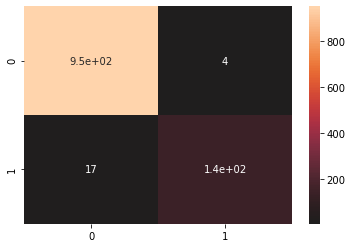

In [114]:
#### Confusion matrix for name base classifier
cm=confusion_matrix(y_test,y_pred_BNB)
print("Confusion Matrix is:", cm, sep='\n') 
sns.heatmap(cm,center=True,annot=True)

In [115]:
from sklearn.metrics import classification_report
CR=classification_report(y_test,y_pred_BNB)
print(CR)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.97      0.89      0.93       160

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Area under the curve: 0.9958049738219896


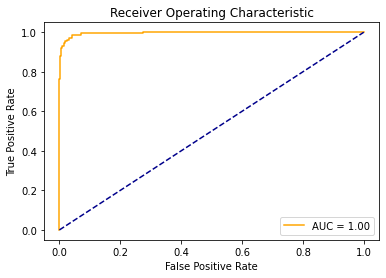

In [116]:
#### Return probability estimates for the test vector 
probs = bnb.predict_proba(X_test)

#### Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc_BNB = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc_BNB)

#### plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc_BNB)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Name based classifier - MultinomialNB

In [117]:
from time import time
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB() 

print("Start training...")
tStart = time()
mnb.fit(X_train, y_train)
tEnd = time()
print("Training time: ", round(tEnd-tStart, 3), "s")

#### making predictions on the training set 
y_pred_train = mnb.predict(X_train) 
print("Train Dataset Accuracy: ", metrics.accuracy_score(y_train, y_pred_train)*100)

#### making predictions on the testing set 
y_pred_MNB = mnb.predict(X_test) 
print("Test Dataset Accuracy: ", metrics.accuracy_score(y_test, y_pred_MNB)*100)

Start training...
Training time:  0.077 s
Train Dataset Accuracy:  98.11532420910926
Test Dataset Accuracy:  97.9372197309417


Confusion Matrix is:
[[955   0]
 [ 23 137]]


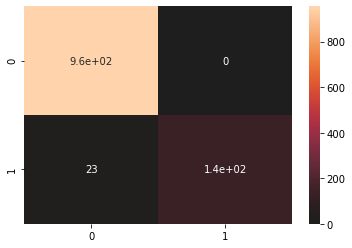

In [118]:
#### Confusion matrix for name base classifier
cm=confusion_matrix(y_test,y_pred_MNB)
print("Confusion Matrix is:", cm, sep='\n') 
sns.heatmap(cm,center=True,annot=True)

In [119]:
from sklearn.metrics import classification_report
CR=classification_report(y_test,y_pred_MNB)
print(CR)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.86      0.92       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Area under the curve: 0.9920287958115184


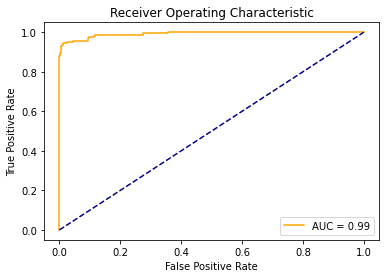

In [120]:
#### Return probability estimates for the test vector 
probs = mnb.predict_proba(X_test)

#### Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc_MNB = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc_MNB)

#### plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc_MNB)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

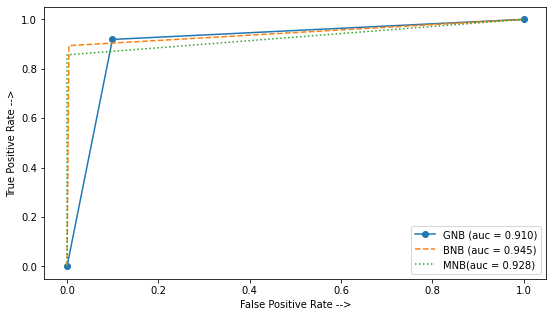

In [121]:
from sklearn.metrics import roc_curve, auc

GNB_tpr,GNB_fpr,threshold=roc_curve(y_test,y_pred_GNB)
auc_GNB = auc(GNB_tpr, GNB_fpr)

BNB_tpr, BNB_fpr, threshold = roc_curve(y_test, y_pred_BNB)
auc_BNB = auc(BNB_tpr, BNB_fpr)

MNB_tpr, MNB_fpr, threshold = roc_curve(y_test, y_pred_MNB)
auc_MNB = auc(MNB_tpr, MNB_fpr)

plt.figure(figsize=(9, 5))
plt.plot(GNB_tpr, GNB_fpr, marker='o', label='GNB (auc = %0.3f)' % auc_GNB)
plt.plot(BNB_tpr, BNB_fpr, linestyle='--', label='BNB (auc = %0.3f)' % auc_BNB)
plt.plot(MNB_tpr, MNB_fpr, linestyle=':', label='MNB(auc = %0.3f)' % auc_MNB)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

**CONCLUSION:**
**SO A GENERALISED MODEL WOULD BE GNB**.